In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
pwd

'C:\\Users\\Jaimie Nguyen\\OneDrive\\Desktop\\Data Project\\project-group36-project\\data\\raw'

In [54]:
cd ..

C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\data


In [55]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1ED4-D029

 Directory of C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\data

07/27/2021  01:28 PM    <DIR>          .
07/27/2021  01:28 PM    <DIR>          ..
07/27/2021  01:28 PM    <DIR>          .ipynb_checkpoints
07/15/2021  10:14 AM    <DIR>          processed
07/15/2021  10:14 AM    <DIR>          raw
07/15/2021  10:14 AM                 8 README.md
               1 File(s)              8 bytes
               5 Dir(s)  122,979,184,640 bytes free


In [56]:
cd ..

C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project


In [57]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1ED4-D029

 Directory of C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project

07/27/2021  01:28 PM    <DIR>          .
07/27/2021  01:28 PM    <DIR>          ..
07/15/2021  10:14 AM            11,141 .gitignore
07/27/2021  01:28 PM    <DIR>          .ipynb_checkpoints
07/15/2021  11:47 AM    <DIR>          analysis
07/15/2021  10:14 AM                 0 CODE_OF_CONDUCT.md
07/27/2021  01:28 PM    <DIR>          data
07/15/2021  10:14 AM    <DIR>          images
07/15/2021  10:14 AM             1,072 LICENSE
07/15/2021  10:14 AM    <DIR>          presentation
07/15/2021  11:33 AM             2,332 README.md
               4 File(s)         14,545 bytes
               7 Dir(s)  122,979,119,104 bytes free


In [58]:
cd data

C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\data


In [59]:
cd raw

C:\Users\Jaimie Nguyen\OneDrive\Desktop\Data Project\project-group36-project\data\raw


In [91]:
df=pd.read_csv("Athenslistings.csv")

In [122]:
df= df[[ 'property_type', 'accommodates', 'price']]

df['price']=df['price'].replace({r'\$':''}, regex = True)
df['price']=df['price'].replace({r'\,':''}, regex = True)

df

,property_type,accommodates,price
0,Entire apartment,8,74.0
1,Entire apartment,4,50.0
2,Entire apartment,2,40.0
3,Entire apartment,4,50.0
4,Entire apartment,4,50.0
...,...,...,...
9505,Entire apartment,2,50.0
9506,Entire apartment,4,40.0
9507,Entire apartment,6,392.0
9508,Entire condominium,6,34.0


In [115]:
df['price'] = pd.to_numeric(df['price'])


In [123]:
df['per_person'] = df['price']/df['accommodates']
df['per_person']=df['per_person'].round(2)
print(df['per_person'])

0        9.25
1       12.50
2       20.00
3       12.50
4       12.50
        ...  
9505    25.00
9506    10.00
9507    65.33
9508     5.67
9509    62.50
Name: per_person, Length: 9510, dtype: float64


In [146]:
Apdf=df[df['property_type'] =='Entire apartment'].reset_index(drop=True)
Apdf=df[df['per_person'] < 300]
Apdf

,property_type,accommodates,price,per_person
0,Entire apartment,8,74.0,9.25
1,Entire apartment,4,50.0,12.50
2,Entire apartment,2,40.0,20.00
3,Entire apartment,4,50.0,12.50
4,Entire apartment,4,50.0,12.50
...,...,...,...,...
9505,Entire apartment,2,50.0,25.00
9506,Entire apartment,4,40.0,10.00
9507,Entire apartment,6,392.0,65.33
9508,Entire condominium,6,34.0,5.67


In [125]:
condf=df[df['property_type'] =='Entire condominium'].reset_index(drop=True)
condf

,property_type,accommodates,price,per_person
0,Entire condominium,12,298.0,24.83
1,Entire condominium,8,189.0,23.62
2,Entire condominium,2,44.0,22.00
3,Entire condominium,5,80.0,16.00
4,Entire condominium,12,294.0,24.50
...,...,...,...,...
284,Entire condominium,5,20.0,4.00
285,Entire condominium,2,35.0,17.50
286,Entire condominium,2,104.0,52.00
287,Entire condominium,4,19.0,4.75


In [165]:
prapdf=df[df['property_type'] =='Private room in apartment'].reset_index(drop=True)
prcondf=df[df['property_type'] =='Private room in condominium'].reset_index(drop=True)
private=prapdf.merge(prcondf,"outer")
private=private[private['per_person'] < 100]
private=private[private['accommodates']<=3]

private

,property_type,accommodates,price,per_person
0,Private room in apartment,1,39.0,39.0
1,Private room in apartment,2,30.0,15.0
2,Private room in apartment,2,30.0,15.0
3,Private room in apartment,2,30.0,15.0
4,Private room in apartment,2,30.0,15.0
...,...,...,...,...
612,Private room in condominium,1,10.0,10.0
613,Private room in condominium,1,10.0,10.0
614,Private room in condominium,1,10.0,10.0
615,Private room in condominium,1,12.0,12.0


In [167]:
df1=df[df['property_type'] !='Entire apartment'].reset_index(drop=True)
df1=df1[df1['property_type'] !='Private room in apartment'].reset_index(drop=True)
df1=df1[df1['property_type'] !='Private room in condominium'].reset_index(drop=True)
df1=df1[df1['property_type'] !='Entire condominium'].reset_index(drop=True)
df2=df1[df1['accommodates'] < 7]
df2=df1[df1['per_person'] < 300]
df2


,property_type,accommodates,price,per_person
0,Entire loft,4,58.0,14.50
1,Entire house,4,45.0,11.25
2,Entire loft,3,32.0,10.67
3,Entire cottage,4,80.0,20.00
4,Entire bed and breakfast,3,120.0,40.00
...,...,...,...,...
1252,Entire villa,10,699.0,69.90
1253,Room in hotel,2,60.0,30.00
1254,Room in hotel,3,253.0,84.33
1255,Entire villa,8,66.0,8.25


Text(0.5, 0, 'Number of Guests')

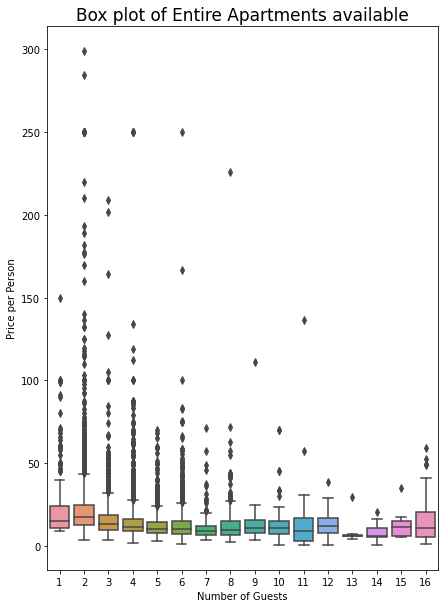

In [184]:
plt.subplots(figsize=(7, 10))
sns.boxplot(x="accommodates", y="per_person", data=Apdf)
plt.ylabel('Price per Person')
plt.title('Box plot of Entire Apartments available',fontsize=17)
plt.xlabel('Number of Guests')

Text(0.5, 0, 'Number of Guests')

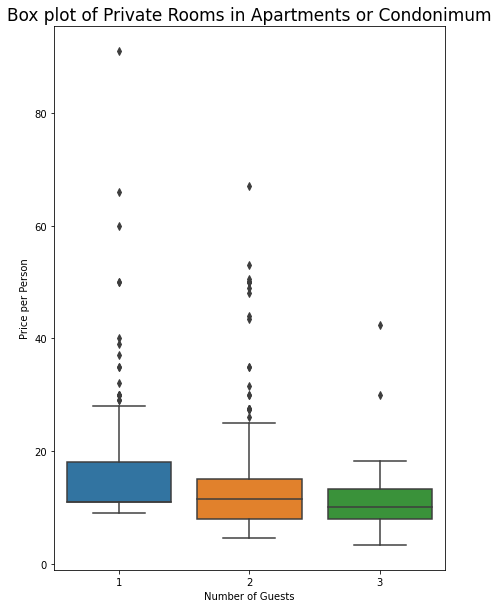

In [183]:
plt.subplots(figsize=(7, 10))
sns.boxplot(x="accommodates", y="per_person", data=private)
plt.ylabel('Price per Person')
plt.title('Box plot of Private Rooms in Apartments or Condonimum',fontsize=17)
plt.xlabel('Number of Guests')

Text(0.5, 0, 'Number of Guests')

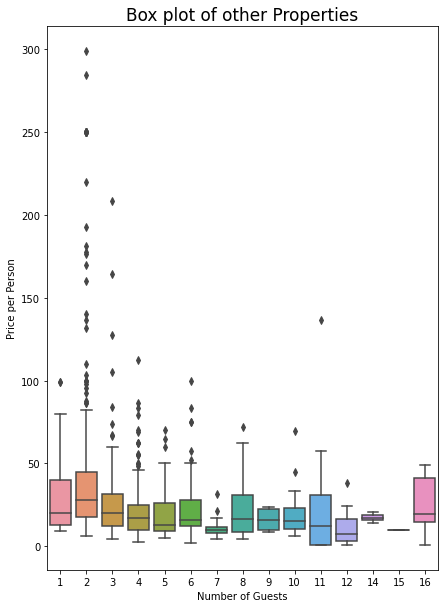

In [181]:
plt.subplots(figsize=(7, 10))
sns.boxplot(x="accommodates", y="per_person", data=df2)
plt.ylabel('Price per Person')
plt.title('Box plot of other Properties',fontsize=17)
plt.xlabel('Number of Guests')

Text(0.5, 0, 'Number of Guests')

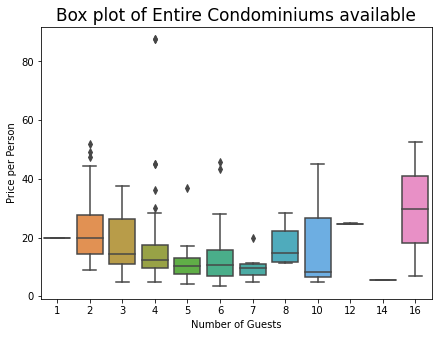

In [180]:
plt.subplots(figsize=(7, 5 ))
sns.boxplot(x="accommodates", y="per_person", data=condf)
plt.ylabel('Price per Person')
plt.title('Box plot of Entire Condominiums available:',fontsize=17)
plt.xlabel('Number of Guests')

Text(0.5, 0, 'Number of Guests')

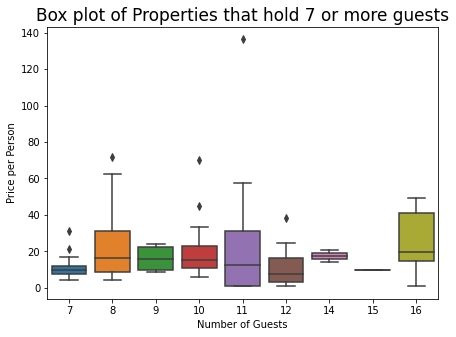

In [177]:
plt.subplots(figsize=(7, 5 ))
sns.boxplot(x="accommodates", y="per_person", data=large)
plt.ylabel('Price per Person')
plt.title('Box plot of Properties that hold 7 or more guests',fontsize=17)
plt.xlabel('Number of Guests')

In [137]:
large = df1[df1['accommodates'] >= 7]
large

,property_type,accommodates,price,per_person
25,Private room in boat,8,260.0,32.50
62,Entire house,8,120.0,15.00
63,Entire house,7,80.0,11.43
94,Entire house,11,340.0,30.91
108,Entire villa,8,216.0,27.00
...,...,...,...,...
1167,Shared room in apartment,11,9.0,0.82
1216,Entire serviced apartment,7,65.0,9.29
1248,Private room in house,8,40.0,5.00
1252,Entire villa,10,699.0,69.90
